In [1]:
import csv
import pprint
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from matplotlib.ticker import MaxNLocator

from rllab import config
from rllab.viskit.core import load_exps_data, color_defaults

# mpl.rc('font', family='Times New Roman')
# mpl.rcParams.update({'font.size': 14})

In [2]:
exps = load_exps_data([os.path.join(config.PROJECT_PATH, "data/s3/lfd-mesh-grad-demos")])

# the experiments have num_grad_updates, num_demos (fast_batch_size), env_noise, seed
exps_by_params = {}


for exp in (exp for exp in exps if '2018' in exp.params['exp_name'] and 'postUpdate_AverageReturn' in exp.progress.keys() and 'postUpdate_AverageSuccess' in exp.progress.keys()):
    key = (exp.params['num_grad_updates'], exp.params['demo_batch_size'], exp.params['env_noise'])
    if key not in exps_by_params.keys():
        exps_by_params[key] = [exp]
    else:
        exps_by_params[key].append(exp)

keys = np.asarray([k for k in exps_by_params.keys()])
sets = []
for axis in range(keys.shape[1]):
    sets.append(set(i for i in keys[:, axis]))
num_grad_updates = np.sort([v for v in sets[0]])
num_demos = np.sort([v for v in sets[1]])
env_noises = np.sort([v for v in sets[2]])
all_axis = {'num_grad_updates': num_grad_updates, 'num_demos': num_demos, 'env_noise': env_noises}

Reading /Users/florensacc/Library/rllab-maml/data/s3/lfd-mesh-grad-demos/progress.csv
[Errno 2] No such file or directory: '/Users/florensacc/Library/rllab-maml/data/s3/lfd-mesh-grad-demos/progress.csv'
Reading /Users/florensacc/Library/rllab-maml/data/s3/lfd-mesh-grad-demos/lfd_mesh_grad_demos_2017_09_07_23_25_33_0001/progress.csv
Reading /Users/florensacc/Library/rllab-maml/data/s3/lfd-mesh-grad-demos/lfd_mesh_grad_demos_2017_09_07_23_26_16_0004/progress.csv
Reading /Users/florensacc/Library/rllab-maml/data/s3/lfd-mesh-grad-demos/lfd_mesh_grad_demos_2017_09_07_23_26_16_0005/progress.csv
Reading /Users/florensacc/Library/rllab-maml/data/s3/lfd-mesh-grad-demos/lfd_mesh_grad_demos_2017_09_07_23_26_16_0006/progress.csv
Reading /Users/florensacc/Library/rllab-maml/data/s3/lfd-mesh-grad-demos/lfd_mesh_grad_demos_2017_09_07_23_26_16_0007/progress.csv
Reading /Users/florensacc/Library/rllab-maml/data/s3/lfd-mesh-grad-demos/lfd_mesh_grad_demos_2017_09_07_23_26_16_0010/progress.csv
Reading /Us

Reading /Users/florensacc/Library/rllab-maml/data/s3/lfd-mesh-grad-demos/lfd_mesh_grad_demos_2017_09_08_11_25_17_0084/progress.csv
Reading /Users/florensacc/Library/rllab-maml/data/s3/lfd-mesh-grad-demos/lfd_mesh_grad_demos_2017_09_08_11_25_17_0086/progress.csv
Reading /Users/florensacc/Library/rllab-maml/data/s3/lfd-mesh-grad-demos/lfd_mesh_grad_demos_2017_09_08_11_25_17_0087/progress.csv
Reading /Users/florensacc/Library/rllab-maml/data/s3/lfd-mesh-grad-demos/lfd_mesh_grad_demos_2017_09_08_11_25_17_0088/progress.csv
Reading /Users/florensacc/Library/rllab-maml/data/s3/lfd-mesh-grad-demos/lfd_mesh_grad_demos_2017_09_08_11_25_17_0089/progress.csv
Reading /Users/florensacc/Library/rllab-maml/data/s3/lfd-mesh-grad-demos/lfd_mesh_grad_demos_2017_09_08_11_25_17_0090/progress.csv
Reading /Users/florensacc/Library/rllab-maml/data/s3/lfd-mesh-grad-demos/lfd_mesh_grad_demos_2017_09_08_11_25_17_0092/progress.csv
Reading /Users/florensacc/Library/rllab-maml/data/s3/lfd-mesh-grad-demos/lfd_mesh_g

In [3]:
all_axis

{'env_noise': array([ 0. ,  0.1]),
 'num_demos': array([  1.,   5.,  10.,  20.]),
 'num_grad_updates': array([ 1.,  5.])}

In [9]:
print(x, y, avg_rews.transpose())

[[0 0 0]
 [1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]] [[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]] [[-347.77497236 -334.17000243]
 [-346.23240824 -335.82528003]
 [-348.46303402 -335.07738013]
 [-346.9517012  -336.01402435]]


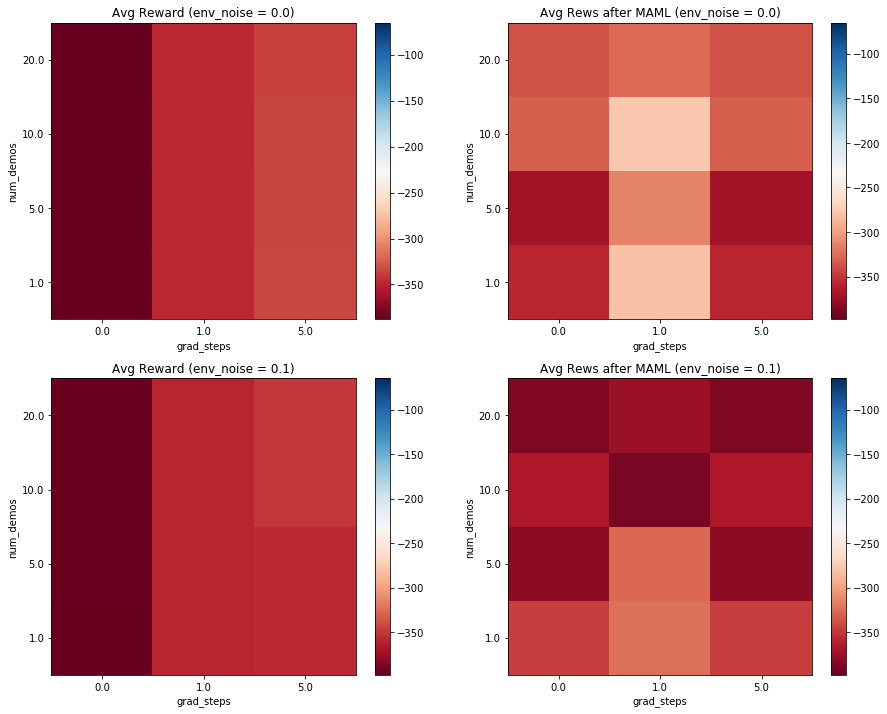

In [40]:
# Example of heatmap with costum MIDDLE tick labels

real_x = num_grad_updates
real_y = num_demos
    
x, y = np.meshgrid(np.arange(len(real_x) + 1 + 1),  # add one more to have pre-Update!
                   np.arange(len(real_y) + 1))

fig = plt.figure(figsize=(15, 12))
for l, outer_value in enumerate(env_noises):
    avg_rews = np.ones((np.size(num_grad_updates) + 1, np.size(num_demos)))
    avg_rews_MAML = np.ones((np.size(num_grad_updates) + 1, np.size(num_demos)))
    for j, y_val in enumerate(real_y):
        for i, x_val in enumerate(real_x):
            key = (int(x_val), int(y_val), outer_value)
            if key in exps_by_params.keys(): # and 'postUpdate_AverageReturn' in exp.progress.keys() and 'postUpdate_AverageSuccess' in exp.progress.keys():
                avg_rews[i + 1, j] = np.mean([exp.progress['postUpdate_AverageReturn'][0] 
                                        for exp in exps_by_params[key]]) 
                avg_rews_MAML[i + 1, j] = np.mean([exp.progress['postUpdate_AverageReturn'][5] 
                                        for exp in exps_by_params[key]]) 
        avg_rews[0, j] = np.mean([exp.progress['preUpdate_AverageReturn'][0] 
                            for exp in exps_by_params[key]]) 
        avg_rews_MAML[0, j] = np.mean([exp.progress['postUpdate_AverageReturn'][5] 
                                        for exp in exps_by_params[key]])
        

#     avg_rews_min, avg_rews_max = avg_rews.min(), avg_rews.max()
    avg_rews_min, avg_rews_max = np.min(avg_rews), -65
    avg_rews_MAML_min, avg_rews_MAML_max = np.min(avg_rews), -65

    plt.subplot(2, 2, 2 * l + 1)
    plt.pcolormesh(x, y, avg_rews.transpose(), cmap='RdBu', vmin=avg_rews_min, vmax=avg_rews_max)
    labels = np.concatenate([[0], real_x])   
    ticks = np.arange(0.5, len(labels), 1)
    plt.xticks(ticks, labels)
    ticks = np.arange(0.5, len(real_y), 1)
    labels = real_y
    plt.yticks(ticks, labels)
    plt.xlabel('grad_steps')
    plt.ylabel('num_demos')
    plt.title('Avg Reward (env_noise = ' + str(outer_value) + ')')
    plt.colorbar()
    
    plt.subplot(2, 2, 2 * l + 2)
    plt.pcolormesh(x, y, avg_rews_MAML.transpose(), cmap='RdBu', vmin=avg_succ_min, vmax=avg_succ_max)
    labels = np.concatenate([[0], real_x])   
    ticks = np.arange(0.5, len(labels), 1)
    plt.xticks(ticks, labels)
    ticks = np.arange(0.5, len(real_y), 1)
    labels = real_y
    plt.yticks(ticks, labels)
    plt.xlabel('grad_steps')
    plt.ylabel('num_demos')
    plt.title('Avg Rews after MAML (env_noise = ' + str(outer_value) + ')')

    plt.colorbar()
plt.show()

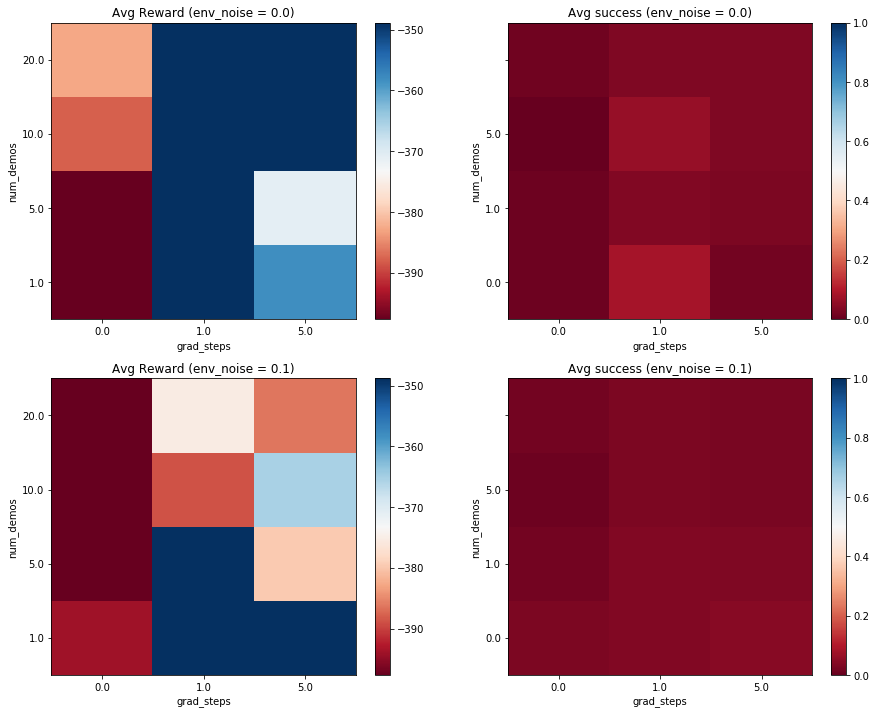

In [34]:
# same plot but 5 steps later

real_x = num_grad_updates
real_y = num_demos
    
x, y = np.meshgrid(np.arange(len(real_x) + 1 + 1),  # add one more to have pre-Update!
                   np.arange(len(real_y) + 1))

fig = plt.figure(figsize=(15, 12))
for l, outer_value in enumerate(env_noises):
    avg_rews = np.ones((np.size(num_grad_updates) + 1, np.size(num_demos)))
    avg_succ = np.ones((np.size(num_grad_updates) + 1, np.size(num_demos)))
    for j, y_val in enumerate(real_y):
        for i, x_val in enumerate(real_x):
            key = (int(x_val), int(y_val), outer_value)
            if key in exps_by_params.keys(): # and 'postUpdate_AverageReturn' in exp.progress.keys() and 'postUpdate_AverageSuccess' in exp.progress.keys():
                avg_rews[i + 1, j] = np.mean([exp.progress['postUpdate_AverageReturn'][5] 
                                        for exp in exps_by_params[key]]) 
                avg_succ[i + 1, j] = np.mean([exp.progress['postUpdate_AverageSuccess'][5] 
                                        for exp in exps_by_params[key]]) 
        avg_rews[0, j] = np.mean([exp.progress['preUpdate_AverageReturn'][5] 
                            for exp in exps_by_params[key]]) 
        avg_succ[0, j] = np.mean([exp.progress['preUpdate_AverageSuccess'][5] 
                                        for exp in exps_by_params[key]])
        

#     avg_rews_min, avg_rews_max = avg_rews.min(), avg_rews.max()
#     avg_rews_min, avg_rews_max = np.min(avg_rews), np.max(avg_rews)
    avg_succ_min, avg_succ_max = 0, 1

    plt.subplot(2, 2, 2 * l + 1)
    plt.pcolormesh(x, y, avg_rews.transpose(), cmap='RdBu', vmin=avg_rews_min, vmax=avg_rews_max)
    labels = np.concatenate([[0], real_x])   
    ticks = np.arange(0.5, len(labels), 1)
    plt.xticks(ticks, labels)
    ticks = np.arange(0.5, len(real_y), 1)
    labels = real_y
    plt.yticks(ticks, labels)
    plt.xlabel('grad_steps')
    plt.ylabel('num_demos')
    plt.title('Avg Reward (env_noise = ' + str(outer_value) + ')')
    plt.colorbar()
    
    plt.subplot(2, 2, 2 * l + 2)
    plt.pcolormesh(x, y, avg_succ.transpose(), cmap='RdBu', vmin=avg_succ_min, vmax=avg_succ_max)
    labels = np.concatenate([[0], real_x])   
    ticks = np.arange(0.5, len(labels), 1)
    plt.xticks(ticks, labels)
    ticks = np.arange(0.5, len(real_y), 1)
    labels = np.concatenate([[0], real_x])   
    plt.yticks(ticks, labels)
    plt.xlabel('grad_steps')
    plt.ylabel('num_demos')
    plt.title('Avg success (env_noise = ' + str(outer_value) + ')')

    plt.colorbar()
plt.show()

In [12]:
# do the same plot for after a few MAML iteration

# try different learning rates

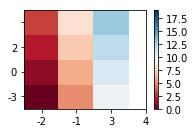

In [13]:
# Example of heatmap with costum MIDDLE tick labels

# generate 2 2d grids for the x & y bounds
real_x = [-2, -1, 3, 4]
real_y = [-3, 0, 2]
y, x = np.meshgrid(np.arange(len(real_x) + 1),
                   np.arange(len(real_y) + 1))

z = np.arange(x.size).reshape(x.shape)
z_min, z_max = z.min(), z.max()


plt.subplot(2, 2, 1)
plt.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ticks = np.arange(0.5, len(real_x), 1)

labels = real_x
plt.xticks(ticks, labels)
labels = real_y
plt.yticks(ticks, labels)

plt.colorbar()